# 1. Facebook networks


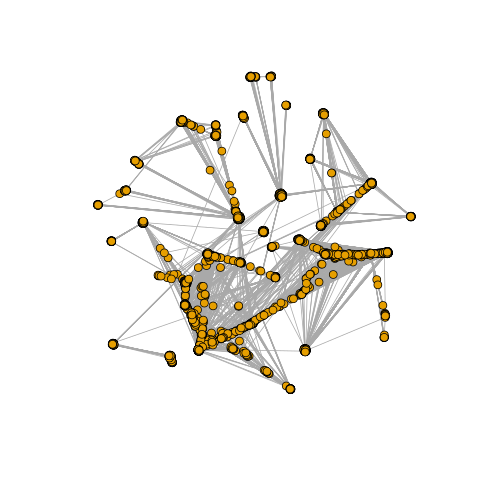

In [ ]:
%%R

# https://igraph.org/r/doc/read_graph.html

file = "facebook_combined.txt"
graph = read_graph(file, format = c("edgelist"), directed=F)
plot(graph, vertex.size=5, vertex.label=NA)


## 1.1 Structure properties of the Facebook network

In [ ]:
%%R
# Q 1.1
cat("Number of nodes in the Facebook network is:", gorder(graph))
cat("\nNumber of edges in the Facebook network is:", gsize(graph))

# Q 1.2
# Check connectivity
cat("\nIs the network connected:", is.connected(graph))

# Is connected, dont need GCC
# size = max(components$csize)
# print(size)

Number of nodes in the Facebook network is: 4039
Number of edges in the Facebook network is: 88234
Is the network connected: TRUE

In [ ]:
%%R
#Q2
# Diameter
cat("Diameter:", diameter(graph, directed = F))

Diameter: 8


 Mean degree is: 43.69101

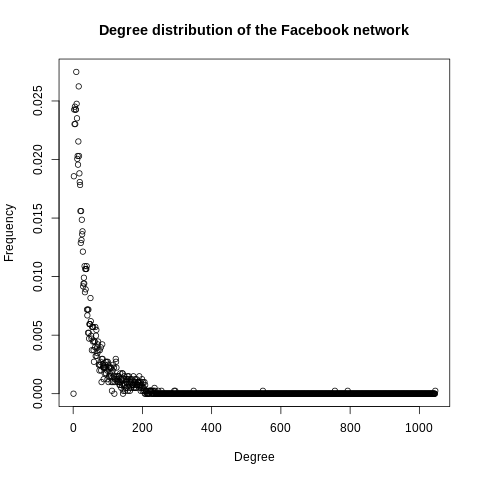

In [ ]:
%%R
#Q3
plot(degree.distribution(graph), 
     main="Degree distribution of the Facebook network", 
     xlab="Degree", ylab="Frequency")
cat("\n Mean degree is:",mean(degree(graph)))


Slope:  -1.247526

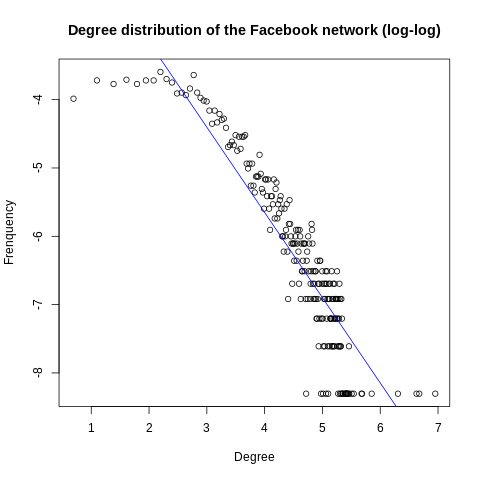

In [ ]:
%%R
#Q4
# Log-log plot
log_degree = log(seq(0:max(degree(graph))))
log_distribution = log(degree.distribution(graph))

valid_idx = !is.infinite(log_degree) & !is.infinite(log_distribution)
log_degree = log_degree[valid_idx]
log_distribution = log_distribution[valid_idx]
cat("\nSlope: ", cov(log_degree, log_distribution) / var(log_degree))

# Fit a line
mod = lm(log_distribution ~ log_degree)
plot(log_degree, log_distribution, 
     main="Degree distribution of the Facebook network (log-log)", 
     xlab="Degree", ylab="Frenquency")
abline(mod,col="blue")

## 1.2 Personalized network

In [ ]:
%%R
#Q5 and Q6
personalized_network = function(graph, target_node)
{
    cat("\n\nPersonalized network of Node", target_node, ":")

    target_network_nodes = neighborhood(graph, order=1, nodes=target_node)

    # Personalized network of target node
    target_node_network = induced.subgraph(graph, unlist(target_network_nodes))

    # Nodes and edges
    cat("\nNumber of nodes:" , vcount(target_node_network))
    cat("\nNumber of edges:", ecount(target_node_network))

    # Diameter
    cat("\nDiameter: ", diameter(target_node_network))
    
    return (target_node_network)
}

target_node_network = personalized_network(graph=graph, target_node=1)



Personalized network of Node 1 :
Number of nodes: 348
Number of edges: 2866
Diameter:  2

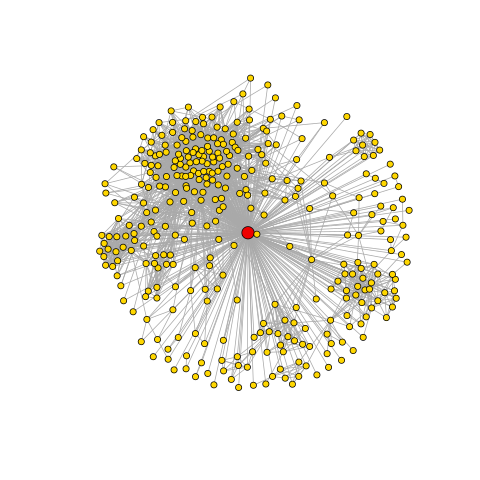

In [ ]:
%%R
#plot the personalized network
sub_graph <- induced_subgraph(graph, c(1, neighbors(graph, 1)))
vertex_size <- rep(4, vcount(sub_graph))
vertex_size[1] <- 8
vertex_color <- rep("gold", vcount(sub_graph))
vertex_color[1] <- "red2"
plot.igraph(sub_graph, vertex.size = vertex_size, vertex.label = NA,
            vertex.color = vertex_color, edge.arrow.size = 0)

## 1.3 Core node’s personalized network	

In [ ]:
%%R

# Question 8

core=c()
deg=c()
for(i in V(graph))
{
    if(length(neighbors(graph, i))>200)
    {
        core=append(core,i)
        deg=append(deg,degree(graph,i))
    }
}
cat("Number of core nodes in the Facebook network is: ", length(core))
cat("\n")
cat("Average degree of the core nodes is: ", mean(deg))

Number of core nodes in the Facebook network is:  40
Average degree of the core nodes is:  279.375

### 3.1. Community structure of core node’s personalized network

In [ ]:
%%R

# Question 9

# plot function

plotFunction = function(community,graph) {
    V(graph)$size= 5
    V(graph)[1]$size = 15 #size of core node
    V(graph)$color <- community$membership + 1
    plot(graph,vertex.label=NA)
}

Modularity of fast greedy for node 1:  0.4131014 
Modularity of edge betweeness for node 1:  0.3533022 
Modularity of infomap for node 1:  0.3891185 


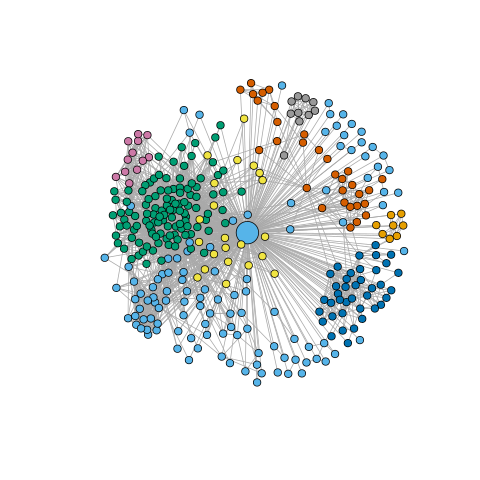

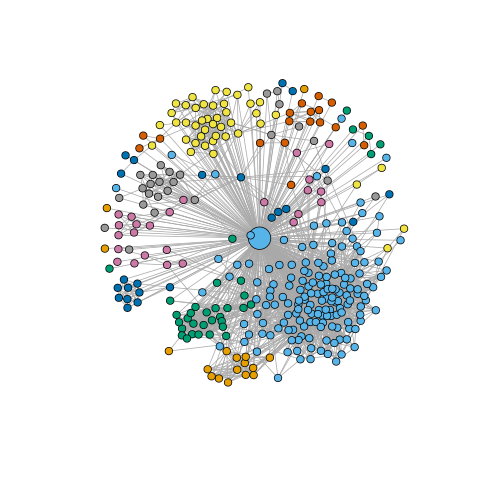

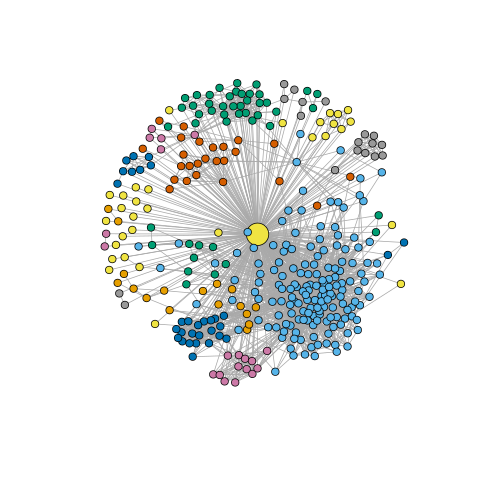

In [ ]:
%%R

# Node ID 1

node_1 = induced_subgraph(graph, c(1,neighbors(graph, 1)), impl ="auto")

node_1_CFG = cluster_fast_greedy(node_1, merges = FALSE, modularity = TRUE)
plotFunction(node_1_CFG,node_1)
cat("Modularity of fast greedy for node 1: ", modularity(node_1_CFG), "\n")

node_1_CEB = cluster_edge_betweenness(node_1, directed=FALSE, modularity=TRUE)
plotFunction(node_1_CEB,node_1)
cat("Modularity of edge betweeness for node 1: ", modularity(node_1_CEB), "\n")

node_1_CI = cluster_infomap(node_1, modularity=TRUE)
plotFunction(node_1_CI,node_1)
cat("Modularity of infomap for node 1: ", modularity(node_1_CI), "\n")


Modularity of fast greedy for node 108:  0.4359294 
Modularity of edge betweeness for node 108:  0.5067549 
Modularity of infomap for node 108:  0.5082492 


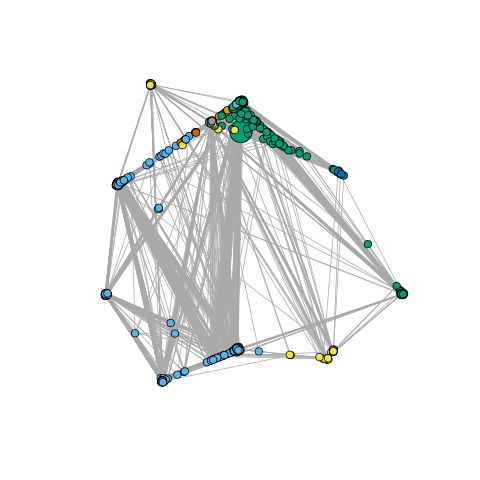

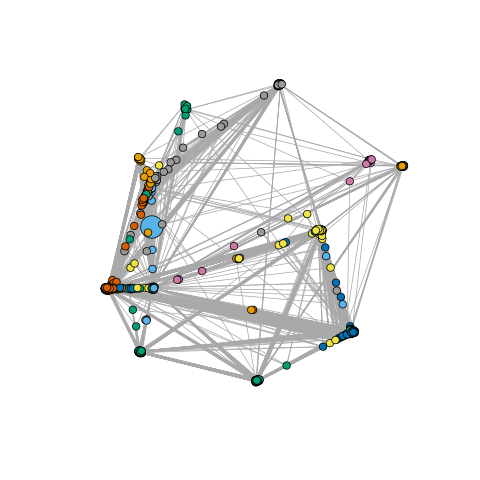

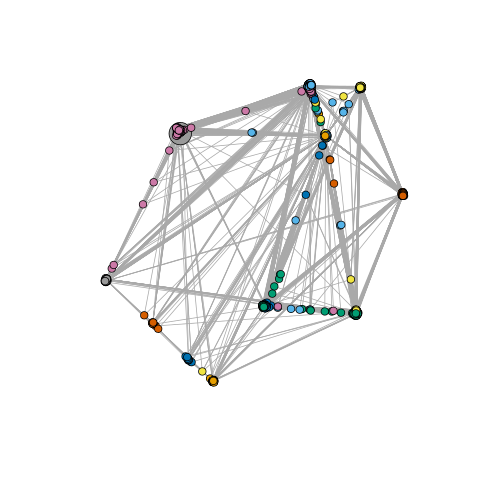

In [ ]:
%%R

# Node ID 108

node_108 = induced_subgraph(graph, c(108,neighbors(graph, 108)), impl ="auto")

node_108_CFG = cluster_fast_greedy(node_108, merges = FALSE, modularity = TRUE)
plotFunction(node_108_CFG,node_108)
cat("Modularity of fast greedy for node 108: ", modularity(node_108_CFG), "\n")

node_108_CEB = cluster_edge_betweenness(node_108, directed=FALSE, modularity=TRUE)
plotFunction(node_108_CEB,node_108)
cat("Modularity of edge betweeness for node 108: ", modularity(node_108_CEB), "\n")

node_108_CI = cluster_infomap(node_108, modularity=TRUE)
plotFunction(node_108_CI,node_108)
cat("Modularity of infomap for node 108: ", modularity(node_108_CI), "\n")


Modularity of fast greedy for node 349:  0.2517149 
Modularity of edge betweeness for node 349:  0.133528 
Modularity of infomap for node 349:  0.203753 


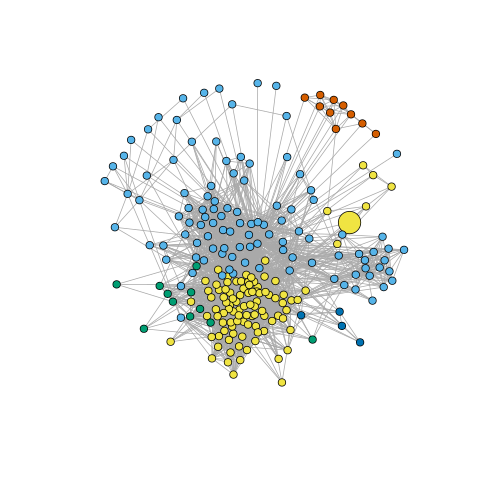

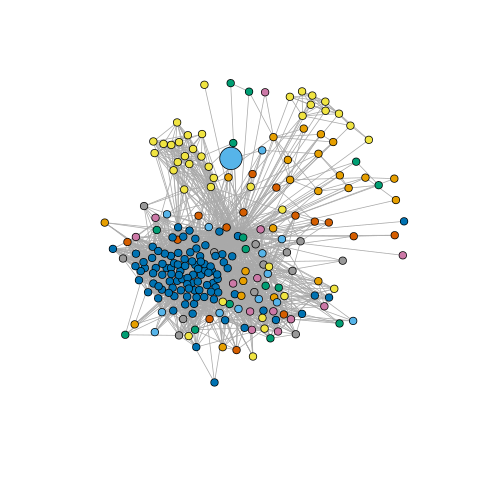

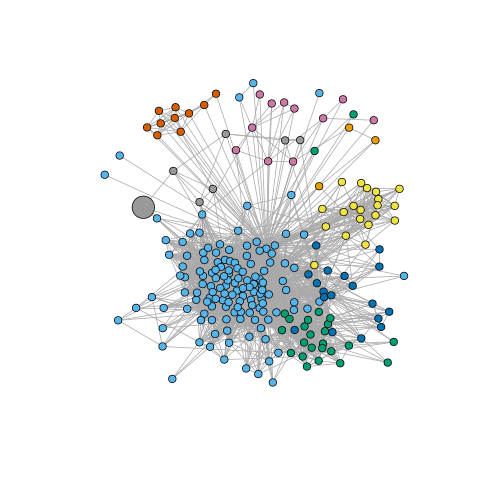

In [ ]:
%%R

# Node ID 349 

node_349 = induced_subgraph(graph, c(349,neighbors(graph, 349)), impl ="auto")

node_349_CFG = cluster_fast_greedy(node_349, merges = FALSE, modularity = TRUE)
plotFunction(node_349_CFG,node_349)
cat("Modularity of fast greedy for node 349: ", modularity(node_349_CFG), "\n")

node_349_CEB = cluster_edge_betweenness(node_349, directed=FALSE, modularity=TRUE)
plotFunction(node_349_CEB,node_349)
cat("Modularity of edge betweeness for node 349: ", modularity(node_349_CEB), "\n")

node_349_CI = cluster_infomap(node_349, modularity=TRUE)
plotFunction(node_349_CI,node_349)
cat("Modularity of infomap for node 349: ", modularity(node_349_CI), "\n")


Modularity of fast greedy for node 484:  0.5070016 
Modularity of edge betweeness for node 484:  0.4890952 
Modularity of infomap for node 484:  0.5152788 


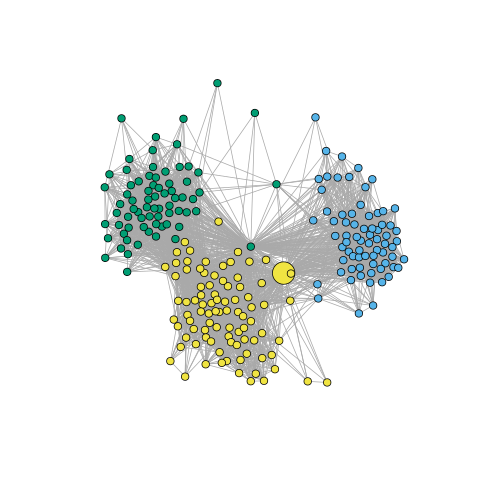

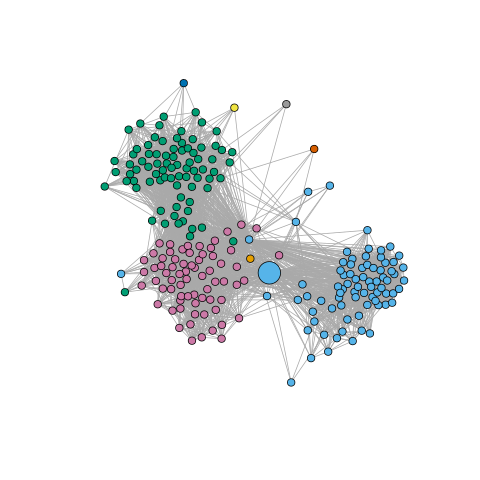

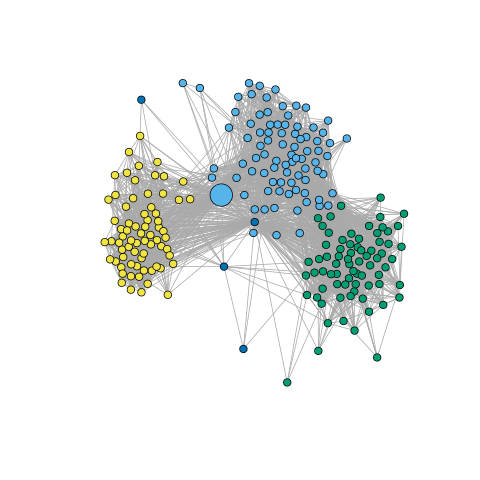

In [ ]:
%%R

# Node ID 484 

node_484 = induced_subgraph(graph, c(484,neighbors(graph, 484)), impl ="auto")

node_484_CFG = cluster_fast_greedy(node_484, merges = FALSE, modularity = TRUE)
plotFunction(node_484_CFG,node_484)
cat("Modularity of fast greedy for node 484: ", modularity(node_484_CFG), "\n")

node_484_CEB = cluster_edge_betweenness(node_484, directed=FALSE, modularity=TRUE)
plotFunction(node_484_CEB,node_484)
cat("Modularity of edge betweeness for node 484: ", modularity(node_484_CEB), "\n")

node_484_CI = cluster_infomap(node_484, modularity=TRUE)
plotFunction(node_484_CI,node_484)
cat("Modularity of infomap for node 484: ", modularity(node_484_CI), "\n")


Modularity of fast greedy for node 1087:  0.1455315 
Modularity of edge betweeness for node 1087:  0.02762377 
Modularity of infomap for node 1087:  0.02690662 


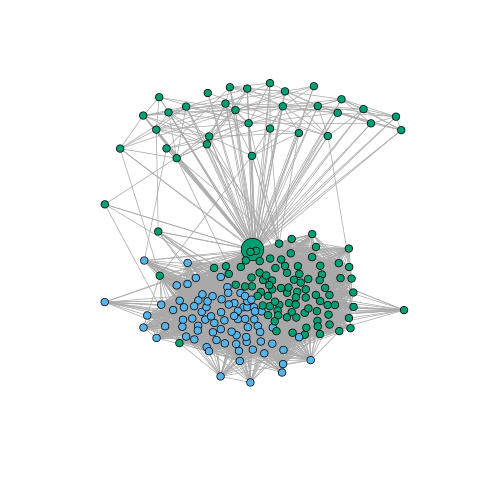

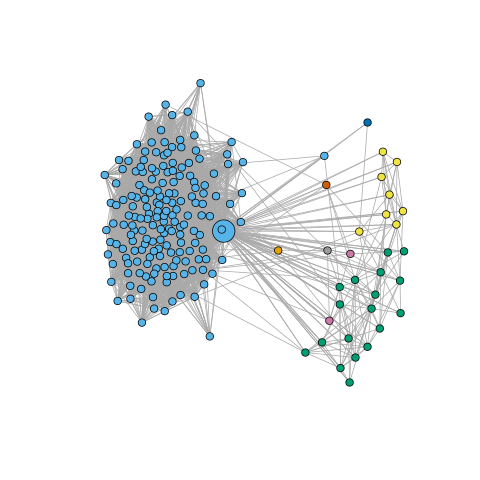

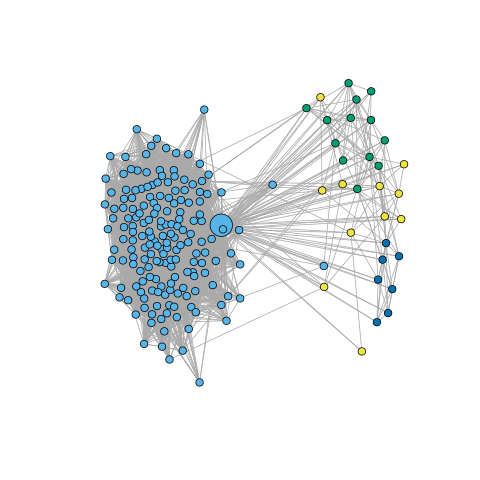

In [ ]:
%%R

# Node ID 1087

node_1087 = induced_subgraph(graph, c(1087,neighbors(graph, 1087)), impl ="auto")

node_1087_CFG = cluster_fast_greedy(node_1087, merges = FALSE, modularity = TRUE)
plotFunction(node_1087_CFG,node_1087)
cat("Modularity of fast greedy for node 1087: ", modularity(node_1087_CFG), "\n")

node_1087_CEB = cluster_edge_betweenness(node_1087, directed=FALSE, modularity=TRUE)
plotFunction(node_1087_CEB,node_1087)
cat("Modularity of edge betweeness for node 1087: ", modularity(node_1087_CEB), "\n")

node_1087_CI = cluster_infomap(node_1087, modularity=TRUE)
plotFunction(node_1087_CI,node_1087)
cat("Modularity of infomap for node 1087: ", modularity(node_1087_CI), "\n")


### 3.2. Community structure with the core node removed

Modularity of fast greedy for node 1:  0.4418533 
Modularity of edge betweeness for node 1:  0.4161461 
Modularity of infomap for node 1:  0.4180077 


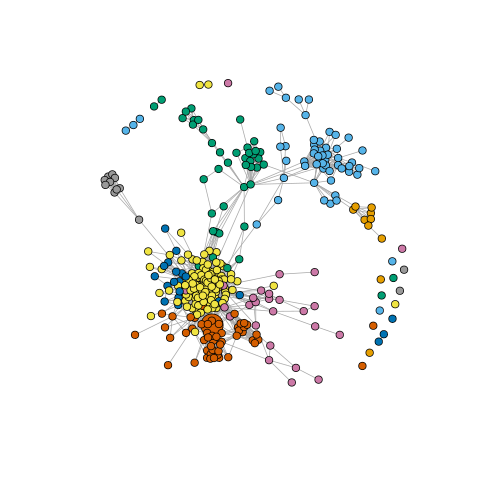

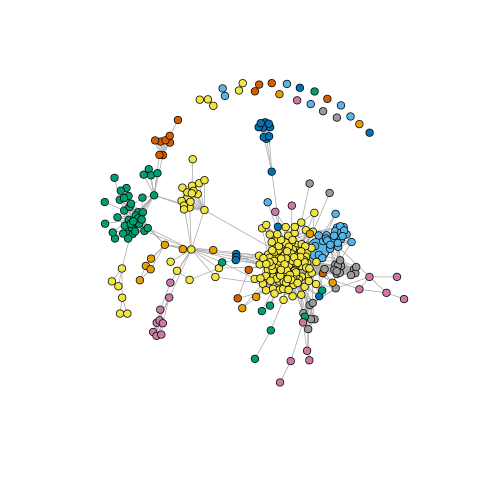

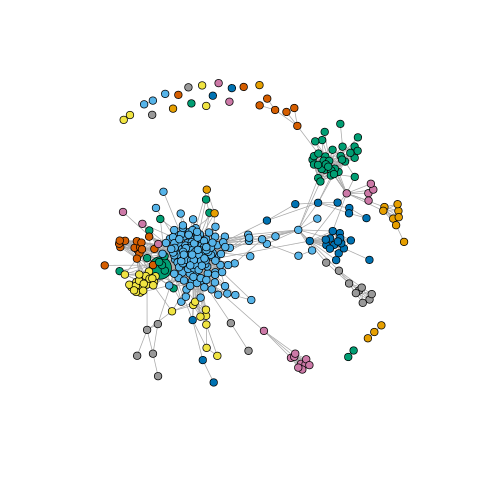

In [ ]:
%%R

# Question 10

# Node ID 1

node_1 = induced_subgraph(graph, c(neighbors(graph, 1)), impl ="auto")

node_1_CFG = cluster_fast_greedy(node_1, merges = FALSE, modularity = TRUE)
plotFunction(node_1_CFG,node_1)
cat("Modularity of fast greedy for node 1: ", modularity(node_1_CFG), "\n")

node_1_CEB = cluster_edge_betweenness(node_1, directed=FALSE, modularity=TRUE)
plotFunction(node_1_CEB,node_1)
cat("Modularity of edge betweeness for node 1: ", modularity(node_1_CEB), "\n")

node_1_CI = cluster_infomap(node_1, modularity=TRUE)
plotFunction(node_1_CI,node_1)
cat("Modularity of infomap for node 1: ", modularity(node_1_CI), "\n")


Modularity of fast greedy for node 108:  0.4581271 
Modularity of edge betweeness for node 108:  0.5213216 
Modularity of infomap for node 108:  0.5185931 


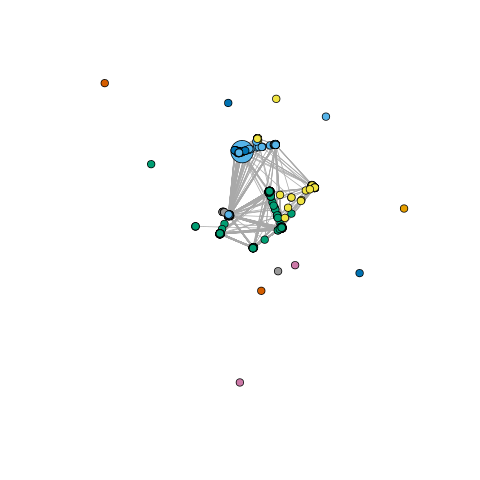

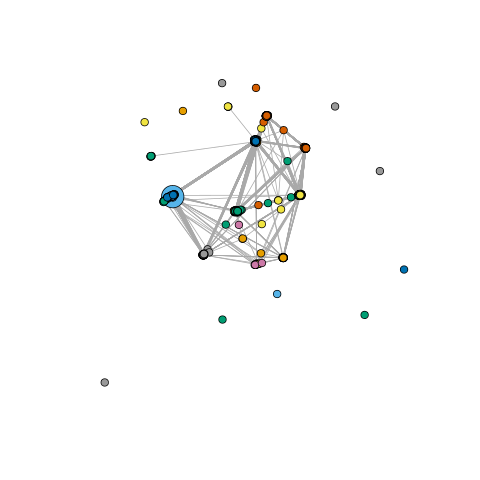

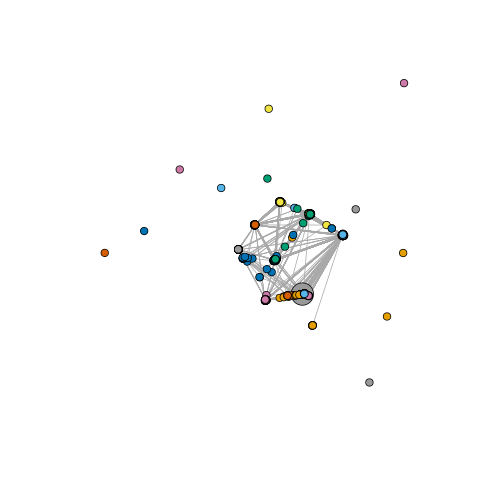

In [ ]:
%%R

# Node ID 108

node_108 = induced_subgraph(graph, c(neighbors(graph, 108)), impl ="auto")

node_108_CFG = cluster_fast_greedy(node_108, merges = FALSE, modularity = TRUE)
plotFunction(node_108_CFG,node_108)
cat("Modularity of fast greedy for node 108: ", modularity(node_108_CFG), "\n")

node_108_CEB = cluster_edge_betweenness(node_108, directed=FALSE, modularity=TRUE)
plotFunction(node_108_CEB,node_108)
cat("Modularity of edge betweeness for node 108: ", modularity(node_108_CEB), "\n")

node_108_CI = cluster_infomap(node_108, modularity=TRUE)
plotFunction(node_108_CI,node_108)
cat("Modularity of infomap for node 108: ", modularity(node_108_CI), "\n")


Modularity of fast greedy for node 349:  0.2456918 
Modularity of edge betweeness for node 349:  0.1505663 
Modularity of infomap for node 349:  0.2448156 


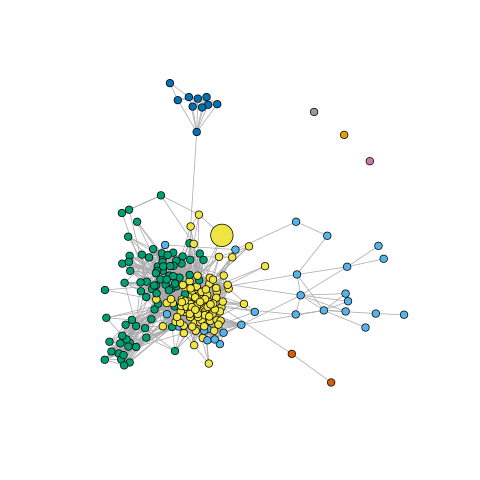

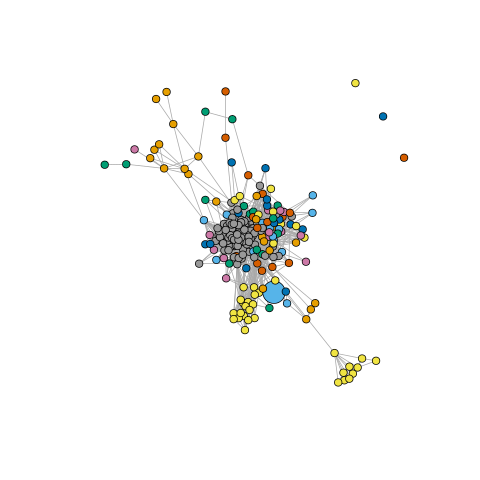

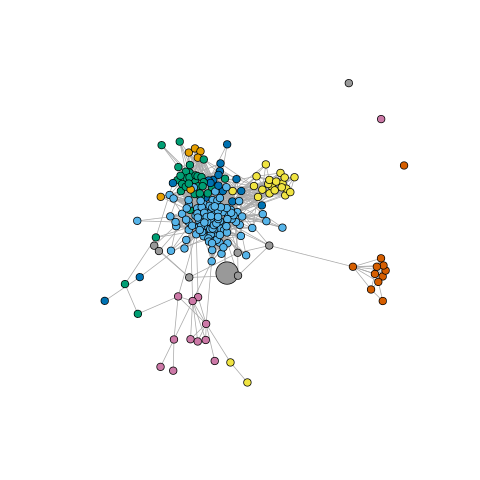

In [ ]:
%%R

# Node ID 349 

node_349 = induced_subgraph(graph, c(neighbors(graph, 349)), impl ="auto")

node_349_CFG = cluster_fast_greedy(node_349, merges = FALSE, modularity = TRUE)
plotFunction(node_349_CFG,node_349)
cat("Modularity of fast greedy for node 349: ", modularity(node_349_CFG), "\n")

node_349_CEB = cluster_edge_betweenness(node_349, directed=FALSE, modularity=TRUE)
plotFunction(node_349_CEB,node_349)
cat("Modularity of edge betweeness for node 349: ", modularity(node_349_CEB), "\n")

node_349_CI = cluster_infomap(node_349, modularity=TRUE)
plotFunction(node_349_CI,node_349)
cat("Modularity of infomap for node 349: ", modularity(node_349_CI), "\n")


Modularity of fast greedy for node 484:  0.5342142 
Modularity of edge betweeness for node 484:  0.5154413 
Modularity of infomap for node 484:  0.5434437 


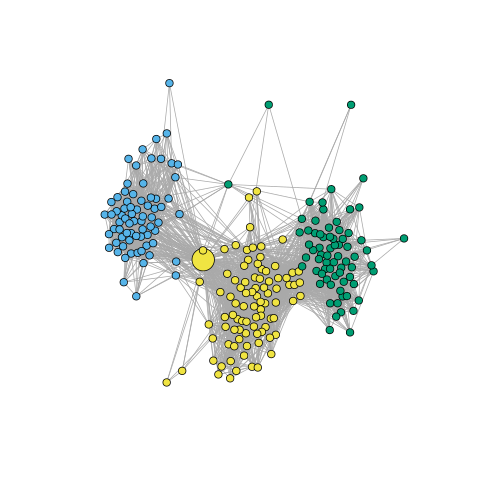

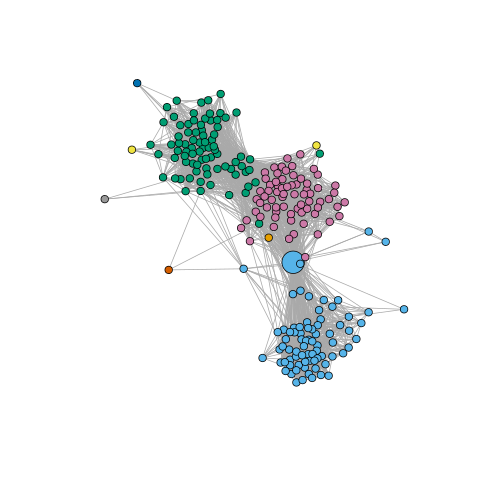

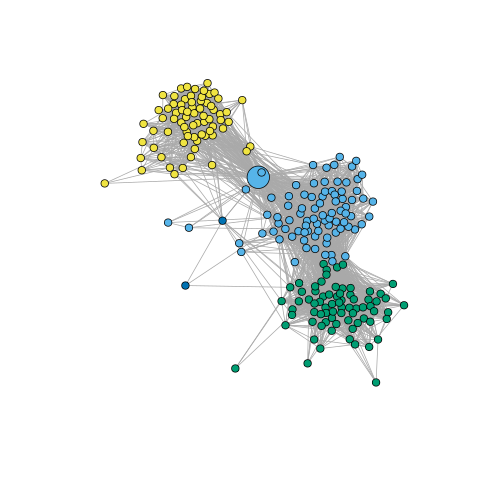

In [ ]:
%%R

# Node ID 484 

node_484 = induced_subgraph(graph, c(neighbors(graph, 484)), impl ="auto")

node_484_CFG = cluster_fast_greedy(node_484, merges = FALSE, modularity = TRUE)
plotFunction(node_484_CFG,node_484)
cat("Modularity of fast greedy for node 484: ", modularity(node_484_CFG), "\n")

node_484_CEB = cluster_edge_betweenness(node_484, directed=FALSE, modularity=TRUE)
plotFunction(node_484_CEB,node_484)
cat("Modularity of edge betweeness for node 484: ", modularity(node_484_CEB), "\n")

node_484_CI = cluster_infomap(node_484, modularity=TRUE)
plotFunction(node_484_CI,node_484)
cat("Modularity of infomap for node 484: ", modularity(node_484_CI), "\n")


Modularity of fast greedy for node 1087:  0.1481956 
Modularity of edge betweeness for node 1087:  0.0324953 
Modularity of infomap for node 1087:  0.02737159 


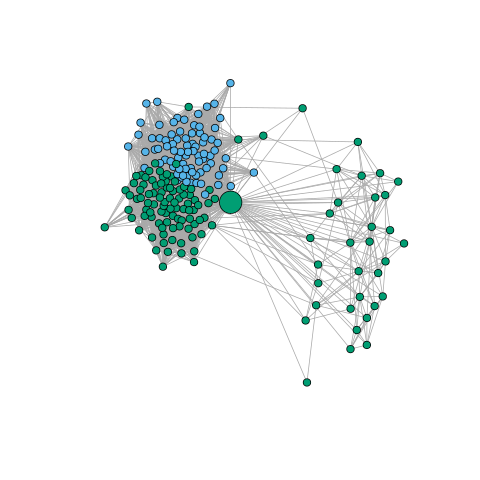

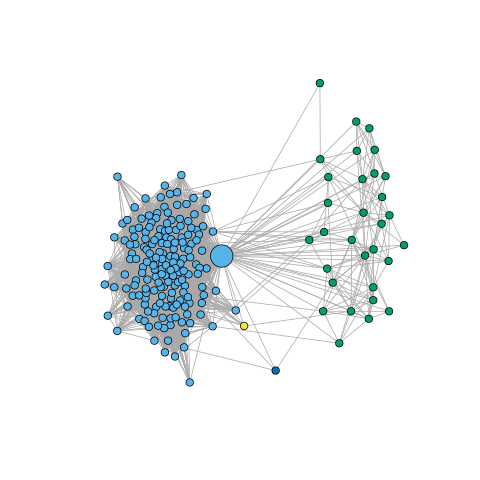

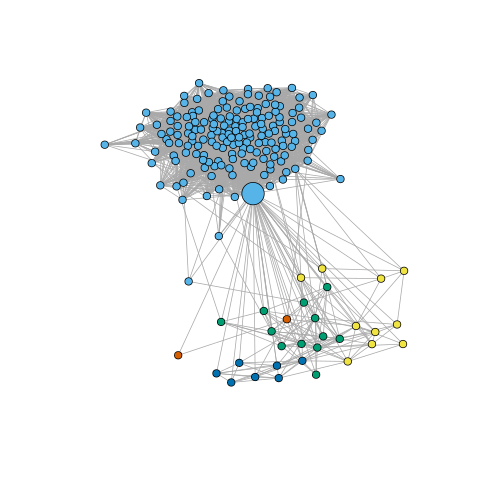

In [ ]:
%%R

# Node ID 1087

node_1087 = induced_subgraph(graph, c(neighbors(graph, 1087)), impl ="auto")

node_1087_CFG = cluster_fast_greedy(node_1087, merges = FALSE, modularity = TRUE)
plotFunction(node_1087_CFG,node_1087)
cat("Modularity of fast greedy for node 1087: ", modularity(node_1087_CFG), "\n")

node_1087_CEB = cluster_edge_betweenness(node_1087, directed=FALSE, modularity=TRUE)
plotFunction(node_1087_CEB,node_1087)
cat("Modularity of edge betweeness for node 1087: ", modularity(node_1087_CEB), "\n")

node_1087_CI = cluster_infomap(node_1087, modularity=TRUE)
plotFunction(node_1087_CI,node_1087)
cat("Modularity of infomap for node 1087: ", modularity(node_1087_CI), "\n")


### 3.3. Characteristic of nodes in the personalized network

In [ ]:
# Question 11

# See report

#### Question 12

In [ ]:
%%R

plotEmbedd = function(id){
    neighboring = neighbors(graph, id)
    node_1 = induced_subgraph(graph, c(id,neighboring), impl ="auto")
    embeddedness <- integer(length(V(node_1)))
    for(i in 1:length(neighboring))
    {
        embeddedness[i] <- length(intersect(neighboring,neighbors(graph,neighboring[i])))
    }
    hist(embeddedness,breaks=50,xlab="Embeddedness",ylab="Frequency",main=sprintf("The distribution of embeddedness for node %i",id))
}

plotDispersion = function(id){
    neighboring = neighbors(graph, id)
    node_1 = induced_subgraph(graph, c(id,neighboring), impl ="auto")
    V(node_1)$name = sort(c(id,neighboring))
    dispersion <- integer(length(V(node_1)))
    for(i in 1:length(neighboring))
    {
        modified_graph <- delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i])))
        V(modified_graph)$name <- V(delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i]))))$name
        
        mutual_node <- intersect(neighboring,neighbors(graph,neighboring[i]))
        
        if (length(mutual_node) == 0){
            dispersion[i] = NA
            next
        }
        
        mutual_node_mod = c()
        for(j in 1:length(mutual_node)){
            mutual_node_mod = c(mutual_node_mod,which(V(modified_graph)$name == mutual_node[j]))
        }

        dispersion[i] <- sum(distances(modified_graph, mutual_node_mod, mutual_node_mod))
    }

    hist(dispersion[which(dispersion!=Inf)]/2,breaks=50,xlab="dispersion",ylab="frequency",main=sprintf("The distribution of dispersion for node %i",id))
}


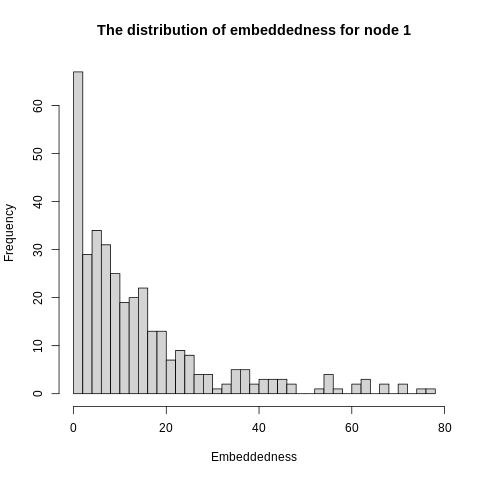

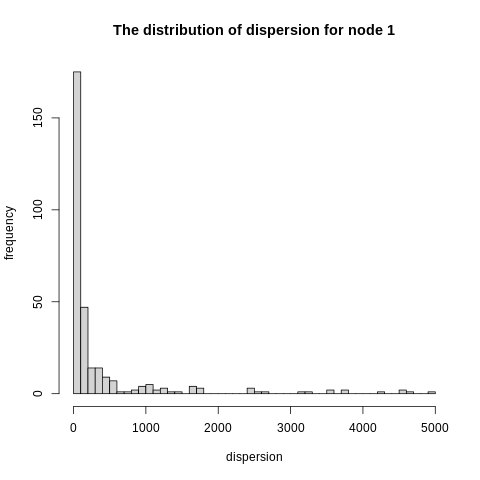

In [ ]:
%%R

# Distribution histogram of embeddedness
# Distribution histogram of dispersion
# Node ID 1

plotEmbedd(1)
plotDispersion(1)


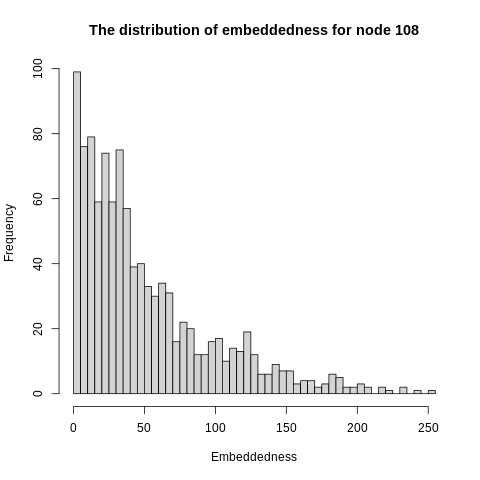

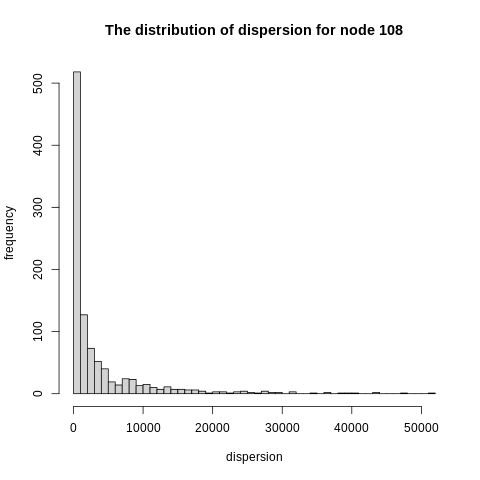

In [ ]:
%%R

# Node ID 108 
plotEmbedd(108)
plotDispersion(108)

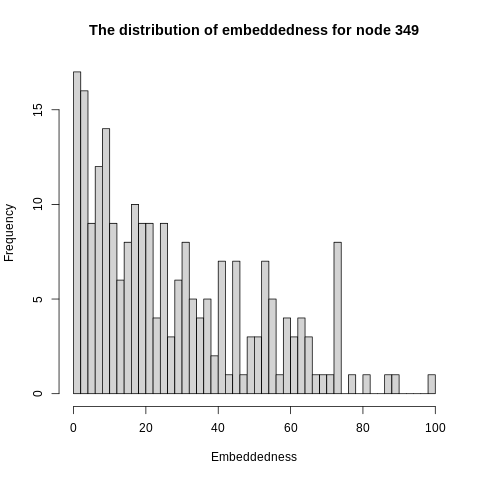

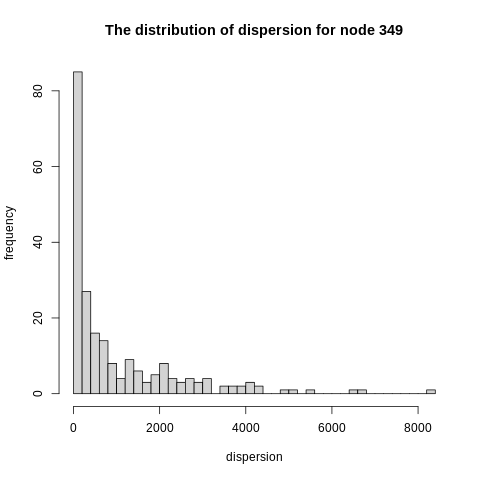

In [ ]:
%%R

# Node ID 349 
plotEmbedd(349)
plotDispersion(349)

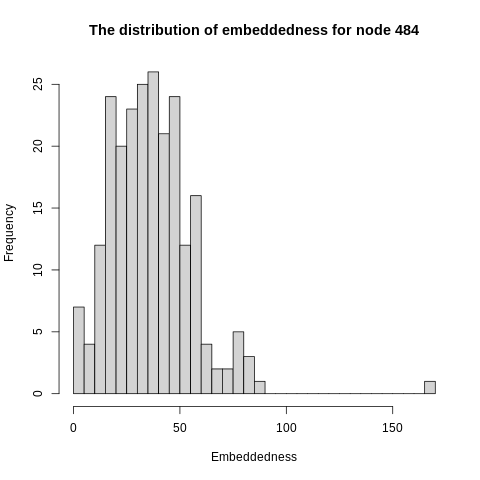

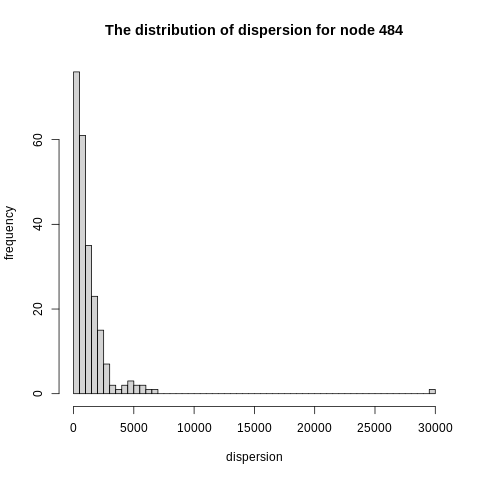

In [ ]:
%%R

# Node ID 484 
plotEmbedd(484)
plotDispersion(484)

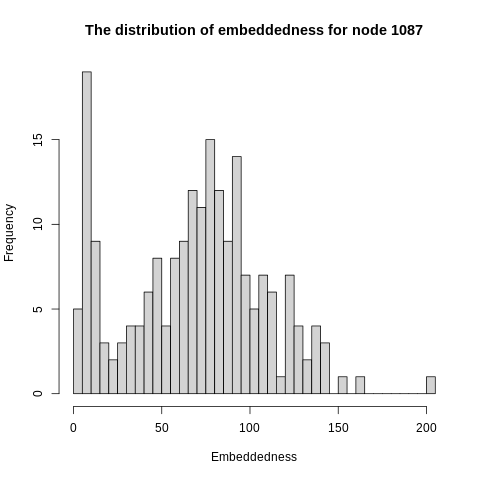

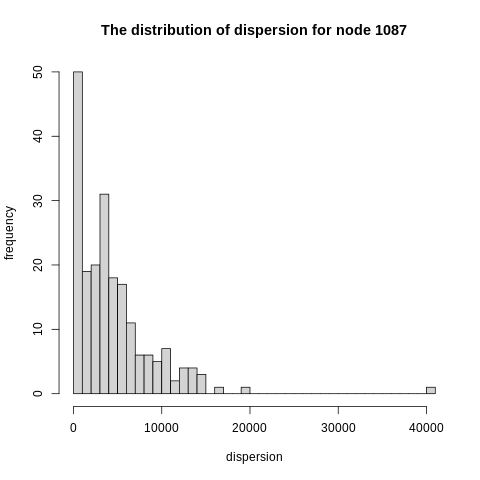

In [ ]:
%%R

# Node ID 1087
plotEmbedd(1087)
plotDispersion(1087)

#### Question 13

In [ ]:
%%R

plotComStructure = function(id,node_1_CFG,node_1){
    neighboring = neighbors(graph, id)
    node_1 = induced_subgraph(graph, c(id,neighboring), impl ="auto")
    V(node_1)$name = sort(c(id,neighboring))
    dispersion <- integer(length(V(node_1)))
    for(i in 1:length(neighboring))
    {
        modified_graph <- delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i])))
        V(modified_graph)$name <- V(delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i]))))$name
        
        mutual_node <- intersect(neighboring,neighbors(graph,neighboring[i]))
        
        if (length(mutual_node) == 0){
            dispersion[i] = NA
            next
        }
        
        mutual_node_mod = c()
        for(j in 1:length(mutual_node)){
            mutual_node_mod = c(mutual_node_mod,which(V(modified_graph)$name == mutual_node[j]))
        }

        dispersion[i] <- sum(distances(modified_graph, mutual_node_mod, mutual_node_mod))
    }

    ver_color <- node_1_CFG$membership + 1
    ver_size = rep(3,length(ver_color))
    edge_color <- rep("grey", length(E(node_1)))
    edge_wei = rep(0.5, length(E(node_1)))
    max_disp = which(V(node_1)$name == V(node_1)$name[which.max(dispersion[which(dispersion!=Inf)])])
    ver_size[max_disp] = 10
    ver_color[max_disp] = 1
    edge_list = get.edgelist(node_1, name = FALSE)
    edge_color[which(edge_list[,1] == max_disp | edge_list[,2] == max_disp)] = "blue";
    edge_wei[which(edge_list[,1] == max_disp | edge_list[,2] == max_disp)] = "3";

    cat(sprintf("Node %i has max dispersion for core node %i\n", max_disp, id))

    plot(node_1, vertex.size = ver_size, vertex.label = NA , edge.color =  edge_color, edge.width = edge_wei, vertex.color = ver_color)
}

Node 46 has max dispersion for core node 1
Node 993 has max dispersion for core node 108
Node 30 has max dispersion for core node 349
Node 1 has max dispersion for core node 484
Node 1 has max dispersion for core node 1087


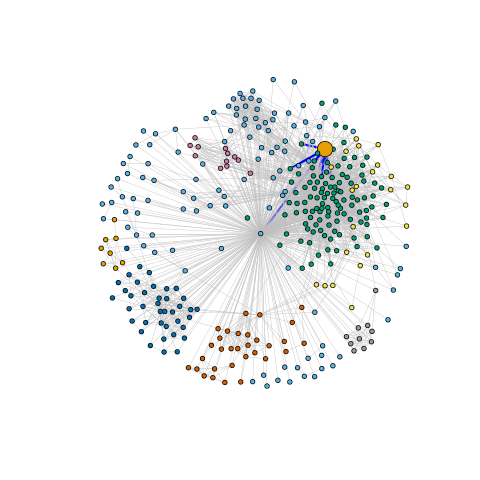

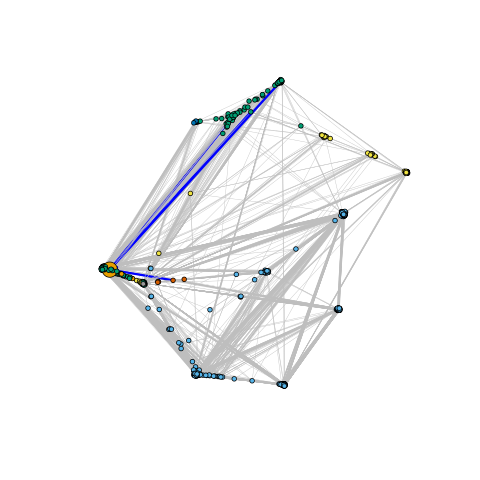

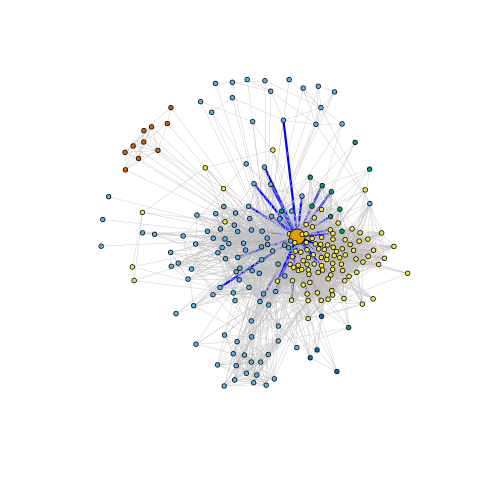

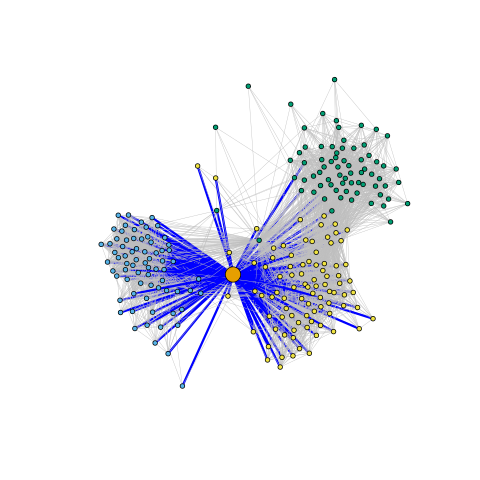

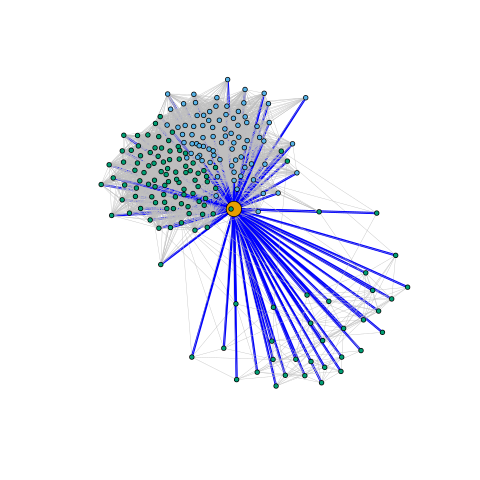

In [ ]:
%%R

# Question 13

id <- list(1,108,349,484,1087)
for (i in id){
    node_1 = induced_subgraph(graph, c(i,neighbors(graph, i)), impl ="auto")
    node_1_CFG = cluster_fast_greedy(node_1)
    plotComStructure(i,node_1_CFG,node_1)
}



#### Question 14

In [ ]:
%%R

# max embeddedness

plotComStructure2 = function(id,node_1_CFG,node_1){
    
    neighboring = neighbors(graph, id)
    node_1 = induced_subgraph(graph, c(id,neighboring), impl ="auto")
    V(node_1)$name = sort(c(id,neighboring))
    embeddedness <- integer(length(V(node_1)))
    for(i in 1:length(neighboring))
    {
        embeddedness[i] <- length(intersect(neighboring,neighbors(graph,neighboring[i])))
    }


    ver_color <- node_1_CFG$membership + 1
    ver_size = rep(3,length(ver_color))
    edge_color <- rep("grey", length(E(node_1)))
    edge_wei = rep(0.5, length(E(node_1)))
    max_embed = which(V(node_1)$name == V(node_1)$name[which.max(embeddedness[which(embeddedness!=Inf)])])
    ver_size[max_embed] = 10
    ver_color[max_embed] = 1
    edge_list = get.edgelist(node_1, name = FALSE)
    edge_color[which(edge_list[,1] == max_embed | edge_list[,2] == max_embed)] = "blue";
    edge_wei[which(edge_list[,1] == max_embed | edge_list[,2] == max_embed)] = "3";

    cat(sprintf("Node %i has max embeddedness for core node %i\n", max_embed, id))

    plot(node_1, vertex.size = ver_size, vertex.label = NA , edge.color =  edge_color, edge.width = edge_wei, vertex.color = ver_color)
}


Node 56 has max embeddedness for core node 1
Node 1022 has max embeddedness for core node 108
Node 32 has max embeddedness for core node 349
Node 1 has max embeddedness for core node 484
Node 1 has max embeddedness for core node 1087


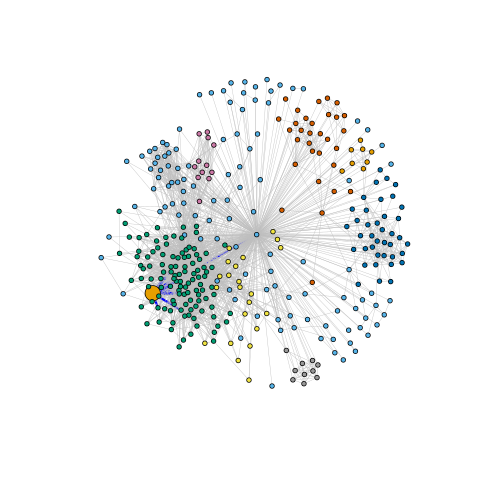

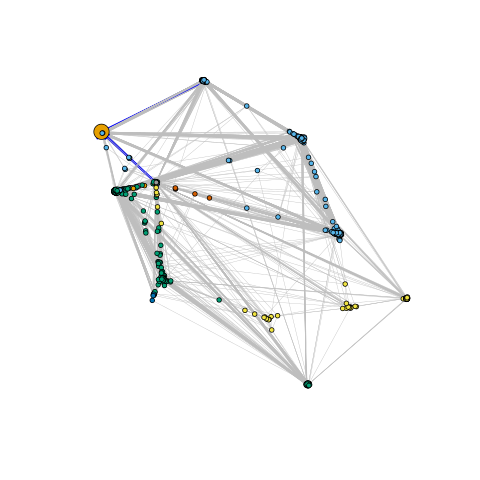

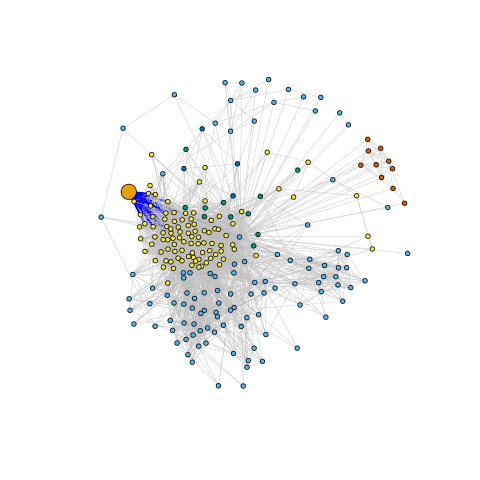

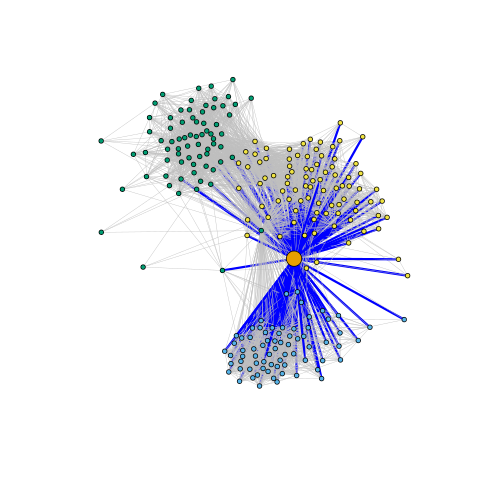

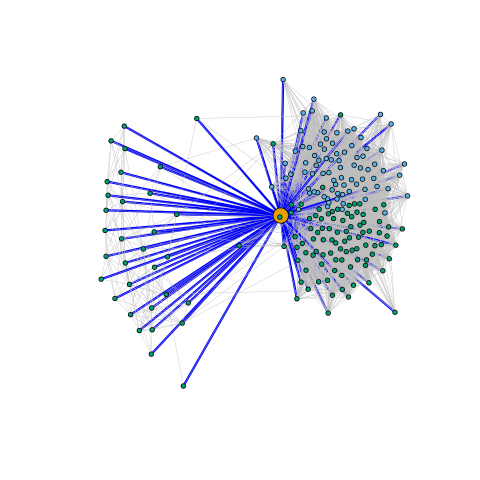

In [ ]:
%%R

# Question 14

id <- list(1,108,349,484,1087)
for (i in id){
    node_1 = induced_subgraph(graph, c(i,neighbors(graph, i)), impl ="auto")
    node_1_CFG = cluster_fast_greedy(node_1)
    plotComStructure2(i,node_1_CFG,node_1)
}


In [ ]:
%%R

# max ratio = dispersion/embeddedness

plotComStructure3 = function(id,node_1_CFG,node_1){
    
    neighboring = neighbors(graph, id)
    node_1 = induced_subgraph(graph, c(id,neighboring), impl ="auto")
    V(node_1)$name = sort(c(id,neighboring))
    embeddedness <- integer(length(V(node_1)))
    dispersion <- integer(length(V(node_1)))
    for(i in 1:length(neighboring))
    {
        embeddedness[i] <- length(intersect(neighboring,neighbors(graph,neighboring[i])))

        modified_graph <- delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i])))
        V(modified_graph)$name <- V(delete.vertices(node_1,c(which(V(node_1)$name==id),which(V(node_1)$name==neighboring[i]))))$name
        
        mutual_node <- intersect(neighboring,neighbors(graph,neighboring[i]))
        
        if (length(mutual_node) == 0){
            dispersion[i] = NA
            next
        }
        
        mutual_node_mod = c()
        for(j in 1:length(mutual_node)){
            mutual_node_mod = c(mutual_node_mod,which(V(modified_graph)$name == mutual_node[j]))
        }

        dispersion[i] <- sum(distances(modified_graph, mutual_node_mod, mutual_node_mod))
    }

    ratio <- dispersion/embeddedness

    ver_color <- node_1_CFG$membership + 1
    ver_size = rep(3,length(ver_color))
    edge_color <- rep("grey", length(E(node_1)))
    edge_wei = rep(0.5, length(E(node_1)))
    max_ratio = which(V(node_1)$name == V(node_1)$name[which.max(ratio[which(ratio!=Inf)])])
    ver_size[max_ratio] = 10
    ver_color[max_ratio] = 1
    edge_list = get.edgelist(node_1, name = FALSE)
    edge_color[which(edge_list[,1] == max_ratio | edge_list[,2] == max_ratio)] = "blue";
    edge_wei[which(edge_list[,1] == max_ratio | edge_list[,2] == max_ratio)] = "3";

    cat(sprintf("Node %i has max ratio for core node %i\n", max_ratio, id))

    plot(node_1, vertex.size = ver_size, vertex.label = NA , edge.color =  edge_color, edge.width = edge_wei, vertex.color = ver_color)
}


Node 18 has max ratio for core node 1
Node 993 has max ratio for core node 108
Node 30 has max ratio for core node 349
Node 1 has max ratio for core node 484
Node 1 has max ratio for core node 1087


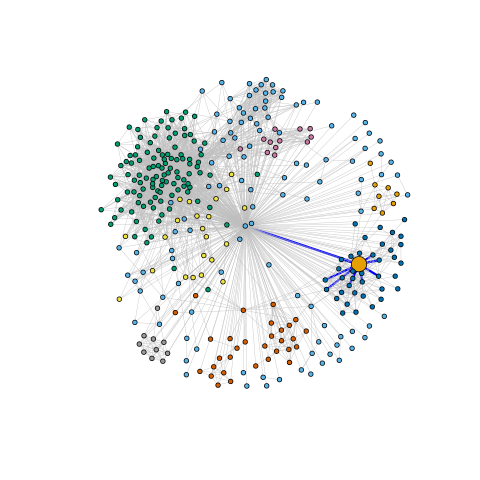

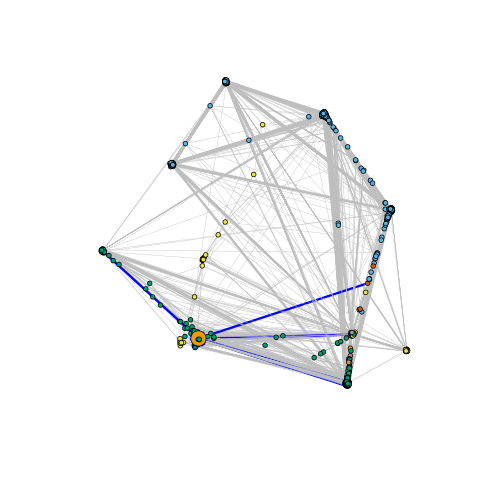

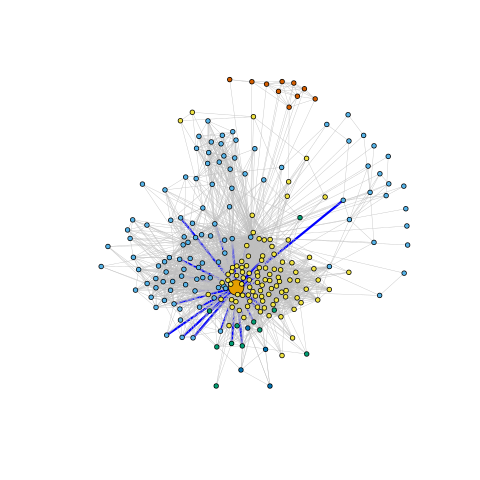

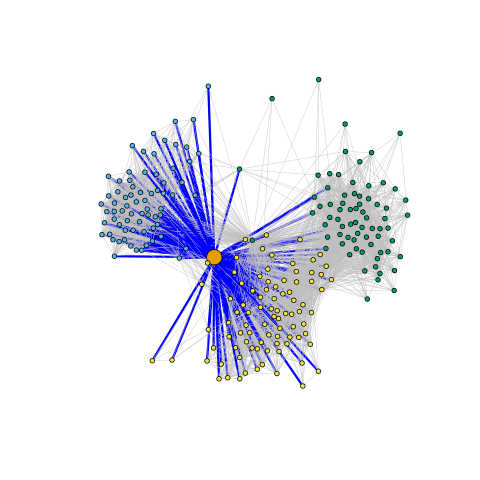

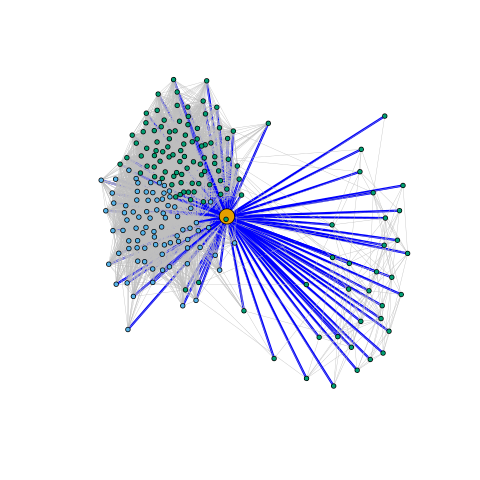

In [ ]:
%%R

# Question 14


id <- list(1,108,349,484,1087)
for (i in id){
    node_1 = induced_subgraph(graph, c(i,neighbors(graph, i)), impl ="auto")
    node_1_CFG = cluster_fast_greedy(node_1)
    plotComStructure3(i,node_1_CFG,node_1)
}



In [ ]:
%%R

# Question 15

# See Report

## 1.4 Friend recommendation in personalized networks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Question 16
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

facebook_file_path = "/content/drive/MyDrive/UCLA/large scale social and complex networks/project2/facebook_combined.txt"
G = nx.read_edgelist(facebook_file_path, delimiter=' ', nodetype=int)

neighbor_of_node = [n for n in G.neighbors(414)]
neighbor_of_node = neighbor_of_node + [414]
H = G.subgraph(neighbor_of_node)
deg = np.array([H.degree(i) for i in H.nodes])
print("number of nodes having degree of 24:", np.sum(deg==24))
deg_select = np.where(deg==24)[0]
print(np.array(H.nodes)[deg_select])

88234
159
number of nodes having degree of 24: 11
[578 600 615 618 627 643 658 659 661 662 496]


In [ ]:
def remove_edge(G, idx, prob):
# G: the graph
# idx: index of the computing node
# prob: probability of removing edge

    remove_edge_idx = [] # to ensure there are some edge is removed

    while len(remove_edge_idx)==0:
        adj_mat = nx.to_numpy_array(G)
        adj_i = adj_mat[idx, :]
        edge_idx = np.where(adj_i==1)[0]
        new_edge_list = np.random.binomial(1, 1-prob, len(edge_idx))
        adj_mat_copy = adj_mat.copy()
        adj_mat_copy[idx, edge_idx] = new_edge_list
        adj_mat_copy[edge_idx, idx] = new_edge_list
        #print(adj_mat[idx, edge_idx])
        #print(adj_mat_copy[idx, edge_idx])
        remove_edge_idx = edge_idx[new_edge_list==0]
        #print(remove_edge_idx)
        #print((adj_mat_copy.T == adj_mat_copy).all())
        G_new = nx.from_numpy_array(adj_mat_copy)
    
    return G_new, remove_edge_idx

def measure_common_neighbor(G, i):
    #print(len(G))
    common_neighbors = []
    for j in range(len(G)):
        count = len(sorted(nx.common_neighbors(G, i, j)))
        common_neighbors.append(count)
    common_neighbors[i] = 0 # empty the (i, i) pair.
    common_neighbors = np.array(common_neighbors)
    return common_neighbors

def measure_jaccard(G, i):
    common_neighbors = []
    for j in range(len(G)):
        count = [p for _, _, p in nx.jaccard_coefficient(G, [(i, j)])][0]
        common_neighbors.append(count)
    
    common_neighbors[i] = 0 # empty the (i, i) pair.
    common_neighbors = np.array(common_neighbors)
    # print(common_neighbors)
    return common_neighbors

def measure_adamic_adar(G, i):
    common_neighbors = []
    for j in range(len(G)):
        count = [p for _, _, p in nx.adamic_adar_index(G, [(i, j)])][0]
        common_neighbors.append(count)
    
    common_neighbors[i] = 0 # empty the (i, i) pair.
    common_neighbors = np.array(common_neighbors)
    # print(common_neighbors)
    return common_neighbors

def get_top_k_index(measure, k, neighbor_idx):
    measure[neighbor_idx] = 0 #mask the neighbor_idx
    top_k_idx = measure.argsort()[-k:][::-1]

    return top_k_idx

def compute_acc(remove_edge_idx, top_k_idx):
    #print(remove_edge_idx, top_k_idx)
    hit = np.intersect1d(remove_edge_idx, top_k_idx)
    acc = len(hit) / len(remove_edge_idx)
    #print(acc)
    return acc

# common neighbor
avg_acc = []
for idx in tqdm(deg_select):
    single_avg_acc = []
    for _ in range(100):
        G_new, remove_edge_idx = remove_edge(H, idx, 0.25)
        neighbor_idx = [n for n in G_new.neighbors(idx)]
        common_neighbors = measure_common_neighbor(G_new, idx)
        top_k_idx = get_top_k_index(common_neighbors, len(remove_edge_idx), neighbor_idx)
        accuracy = compute_acc(remove_edge_idx, top_k_idx)
        single_avg_acc.append(accuracy)
    avg_acc.append(sum(single_avg_acc)/len(single_avg_acc))
print("Common neighbors measure: ", sum(avg_acc) / len(avg_acc))

In [ ]:
avg_acc = []
for idx in tqdm(deg_select):
    single_avg_acc = []
    for _ in range(100):
        G_new, remove_edge_idx = remove_edge(H, idx, 0.25)
        neighbor_idx = [n for n in G_new.neighbors(idx)]
        common_neighbors = measure_jaccard(G_new, idx)
        top_k_idx = get_top_k_index(common_neighbors, len(remove_edge_idx), neighbor_idx)
        accuracy = compute_acc(remove_edge_idx, top_k_idx)
        single_avg_acc.append(accuracy)
    avg_acc.append(sum(single_avg_acc)/len(single_avg_acc))
    print(sum(single_avg_acc)/len(single_avg_acc))
print("Jaccard measure: ", sum(avg_acc) / len(avg_acc))

In [ ]:
avg_acc = []
for idx in tqdm(deg_select):
    single_avg_acc = []
    for _ in range(100):
        G_new, remove_edge_idx = remove_edge(H, idx, 0.25)
        neighbor_idx = [n for n in G_new.neighbors(idx)]
        common_neighbors = measure_adamic_adar(G_new, idx)
        top_k_idx = get_top_k_index(common_neighbors, len(remove_edge_idx), neighbor_idx)
        accuracy = compute_acc(remove_edge_idx, top_k_idx)
        single_avg_acc.append(accuracy)
    avg_acc.append(sum(single_avg_acc)/len(single_avg_acc))
    print(sum(single_avg_acc)/len(single_avg_acc))
print("Adamic_adar measure: ", sum(avg_acc) / len(avg_acc))